In [109]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
mpl.rcParams.update(params)
%matplotlib inline

In [39]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [85]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('us-counties.csv')
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369909 entries, 0 to 369908
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    369909 non-null  object 
 1   county  369909 non-null  object 
 2   state   369909 non-null  object 
 3   fips    366183 non-null  float64
 4   cases   369909 non-null  int64  
 5   deaths  369909 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 16.9+ MB


In [5]:
df.nunique()

date        187
county     1913
state        55
fips       3185
cases     10932
deaths     2005
dtype: int64

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
daily_df = df.groupby(['date'])[['cases', 'deaths']].sum().reset_index()
daily_df['new_cases'] = daily_df['cases'].diff(1)
daily_df['new_cases'].iloc[0] = daily_df['cases'].iloc[0]
daily_df['new_deaths'] = daily_df['deaths'].diff(1)
daily_df['new_deaths'].iloc[0] = daily_df['deaths'].iloc[0]
daily_df['7day_average_new_cases'] = daily_df['new_cases'].rolling(7).mean()
daily_df['7day_average_new_deaths'] = daily_df['new_deaths'].rolling(7).mean()
daily_df

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,date,cases,deaths,new_cases,new_deaths,7day_average_new_cases,7day_average_new_deaths
0,2020-01-21,1,0,1.0,0.0,NaN,NaN
1,2020-01-22,1,0,0.0,0.0,NaN,NaN
2,2020-01-23,1,0,0.0,0.0,NaN,NaN
3,2020-01-24,2,0,1.0,0.0,NaN,NaN
4,2020-01-25,3,0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
182,2020-07-21,3910398,141851,65274.0,1127.0,66378.285714,809.142857
183,2020-07-22,3980128,142982,69730.0,1131.0,66569.571429,832.285714
184,2020-07-23,4050126,144102,69998.0,1120.0,65753.428571,855.571429
185,2020-07-24,4123651,145239,73525.0,1137.0,66162.714286,890.000000


In [67]:
total_cases = daily_df['cases'].max()
total_deaths = daily_df['deaths'].max()
total_cases, total_deaths

(4190316, 146113)

In [8]:
daily_df['date'] = pd.to_datetime(daily_df['date'])
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     187 non-null    datetime64[ns]
 1   cases                    187 non-null    int64         
 2   deaths                   187 non-null    int64         
 3   new_cases                187 non-null    float64       
 4   new_deaths               187 non-null    float64       
 5   7day_average_new_cases   181 non-null    float64       
 6   7day_average_new_deaths  181 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 10.4 KB


In [9]:
def decummulation(row):
    row['new_cases'] = row['cases'].diff(1)
    row['new_cases'].iloc[0] = row['cases'].iloc[0]
    row['new_deaths'] = row['deaths'].diff(1)
    row['new_deaths'].iloc[0] = row['deaths'].iloc[0]
    row['7day_avg_new_cases'] = row['new_cases'].rolling(7).mean()
    row['7day_avg_new_cases'].iloc[0:6] = row['new_cases'].iloc[0:6]
    row['7day_avg_new_deaths'] = row['new_deaths'].rolling(7).mean()
    row['7day_avg_new_deaths'].iloc[0:6] = row['new_deaths'].iloc[0:6]
    return row

In [10]:
df_states = df.groupby(['date','state'])[['cases', 'deaths']].sum().reset_index()
df_states = df_states.groupby('state').apply(decummulation).reset_index()
df_states = df_states.sort_values(['state', 'date'], ascending=[True, True])
df_states

,index,date,state,cases,deaths,new_cases,new_deaths,7day_avg_new_cases,7day_avg_new_deaths
586,586,2020-03-13,Alabama,6,0,6.0,0.0,6.000000,0.000000
637,637,2020-03-14,Alabama,12,0,6.0,0.0,6.000000,0.000000
689,689,2020-03-15,Alabama,23,0,11.0,0.0,11.000000,0.000000
742,742,2020-03-16,Alabama,29,0,6.0,0.0,6.000000,0.000000
795,795,2020-03-17,Alabama,39,0,10.0,0.0,10.000000,0.000000
...,...,...,...,...,...,...,...,...,...
7768,7768,2020-07-21,Wyoming,2238,25,51.0,1.0,41.000000,0.428571
7823,7823,2020-07-22,Wyoming,2288,25,50.0,0.0,43.285714,0.428571
7878,7878,2020-07-23,Wyoming,2347,25,59.0,0.0,45.857143,0.142857
7933,7933,2020-07-24,Wyoming,2405,25,58.0,0.0,48.000000,0.142857


In [11]:
df_states.isna().sum()

index                  0
date                   0
state                  0
cases                  0
deaths                 0
new_cases              0
new_deaths             0
7day_avg_new_cases     0
7day_avg_new_deaths    0
dtype: int64

In [12]:
top_case_states_df = df_states.groupby('state')['cases'].nlargest(1).nlargest(5).reset_index('state')
top_case_states = top_case_states_df['state'].values
top_case_states

array(['California', 'New York', 'Florida', 'Texas', 'New Jersey'],
      dtype=object)

In [14]:
top_case_states_list = [df_states[df_states['state']==st] for st in top_case_states] 

In [15]:
top_death_states_df = df_states.groupby('state')['deaths'].nlargest(1).nlargest(5).reset_index('state')
top_death_states = top_death_states_df['state'].values
top_death_states

array(['New York', 'New Jersey', 'Massachusetts', 'California',
       'Illinois'], dtype=object)

In [16]:
top_death_states_list = [df_states[df_states['state']==st] for st in top_death_states] 

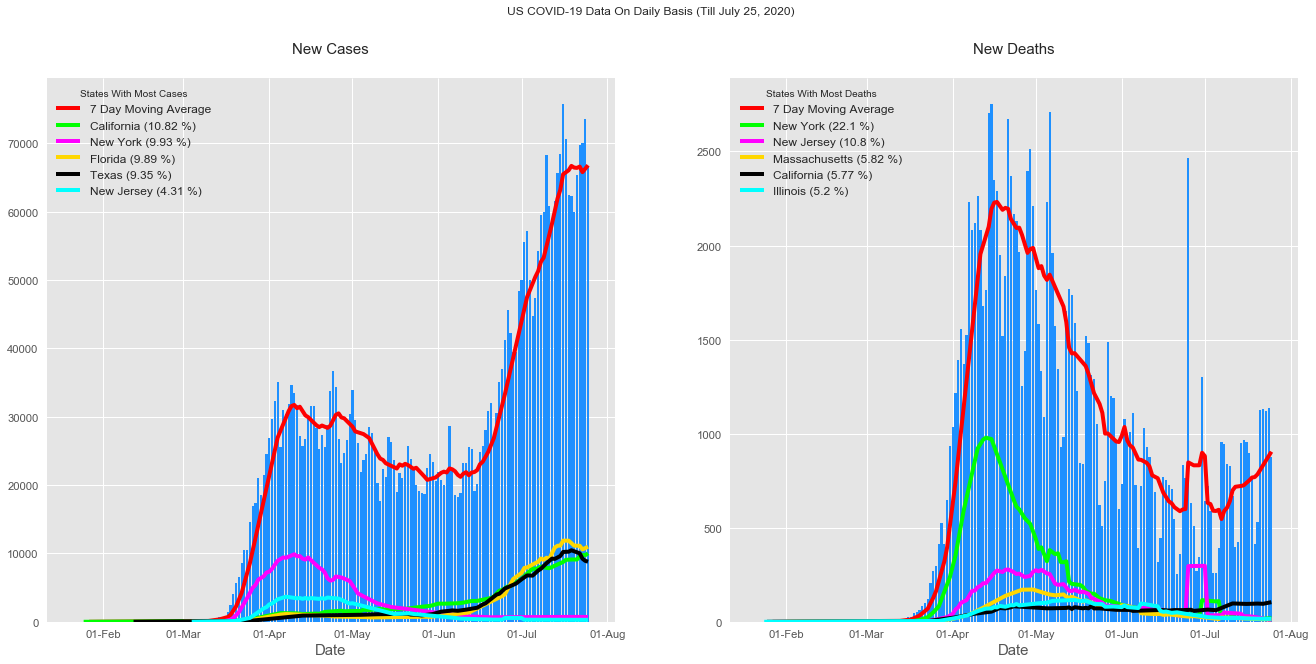

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharex=True)
plt.suptitle('US COVID-19 Data On Daily Basis (Till July 25, 2020)')
ax1.plot(daily_df['date'], daily_df['7day_average_new_cases'], c='red', label='7 Day Moving Average')
ax1.bar(daily_df['date'], daily_df['new_cases'], color='dodgerblue')
colors = ['lime', 'magenta', 'gold', 'black', 'cyan']
for i, ts in enumerate(top_case_states_list):
    prop = round(ts['cases'].max()/total_cases*100, 2)
    ax1.plot(ts['date'], ts['7day_avg_new_cases'], c=colors[i], label=top_case_states[i] + ' ({} %)'.format(prop))
ax1.set_title('New Cases')
ax1.legend(title='States With Most Cases', frameon=False)
ax1.set_xlabel('Date')
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
# ax1.set_xticks(daily_cases['date'])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

ax2.plot(daily_df['date'], daily_df['7day_average_new_deaths'], c='red', label='7 Day Moving Average')
ax2.bar(daily_df['date'], daily_df['new_deaths'], color='dodgerblue')
for i, ts in enumerate(top_death_states_list):
    prop = round(ts['deaths'].max()/total_deaths*100, 2)
    ax2.plot(ts['date'], ts['7day_avg_new_deaths'], c=colors[i], label=top_death_states[i]+ ' ({} %)'.format(prop))
ax2.set_title('New Deaths')
ax2.legend(title='States With Most Deaths', frameon=False)
ax2.set_xlabel('Date')
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
# ax2.set_xticks(daily_cases['date'])
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
plt.savefig('US_COVID-19.png')
plt.show()